<a href="https://colab.research.google.com/github/atharvaK718/Exploratory-Data-Analysis/blob/main/3.Module_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libarires and Dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

df = pd.read_csv("/content/catholic.csv")

# Univariate Analysis

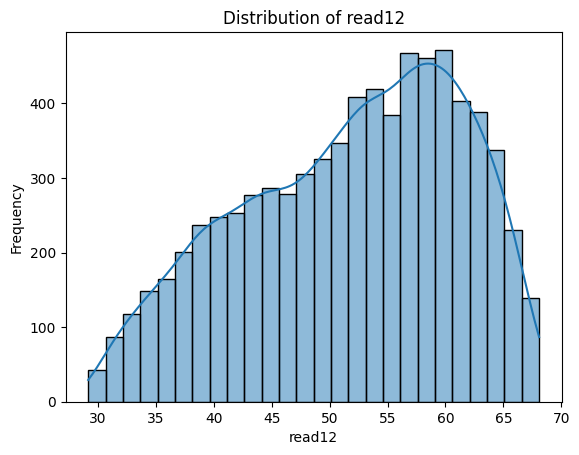

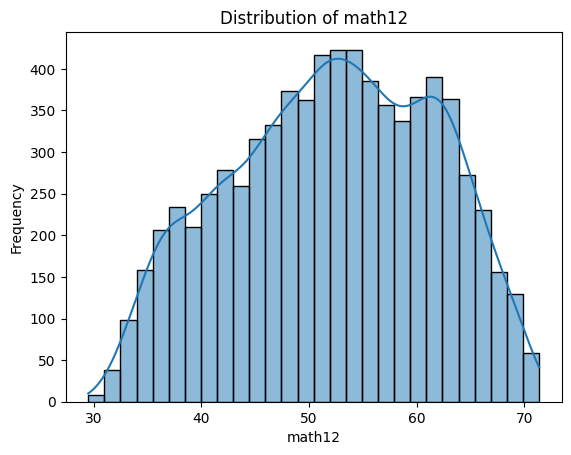

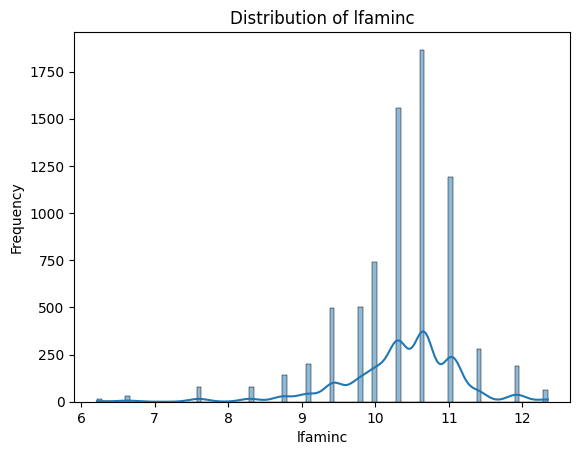

In [14]:
numeric_columns = ['read12', 'math12', 'lfaminc']
for col in numeric_columns:
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

# Bivariate Analysis

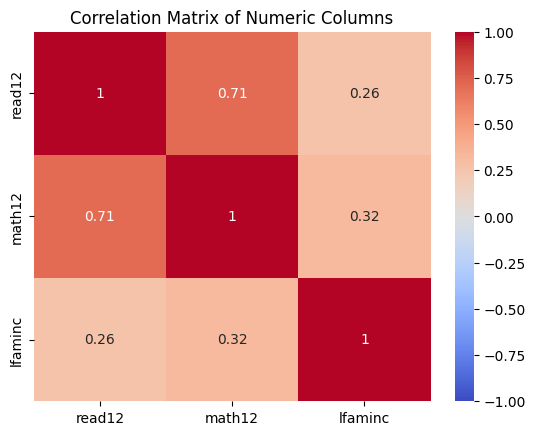

In [15]:
correlation_matrix = df[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix of Numeric Columns")
plt.show()

# Multivariate Analysis

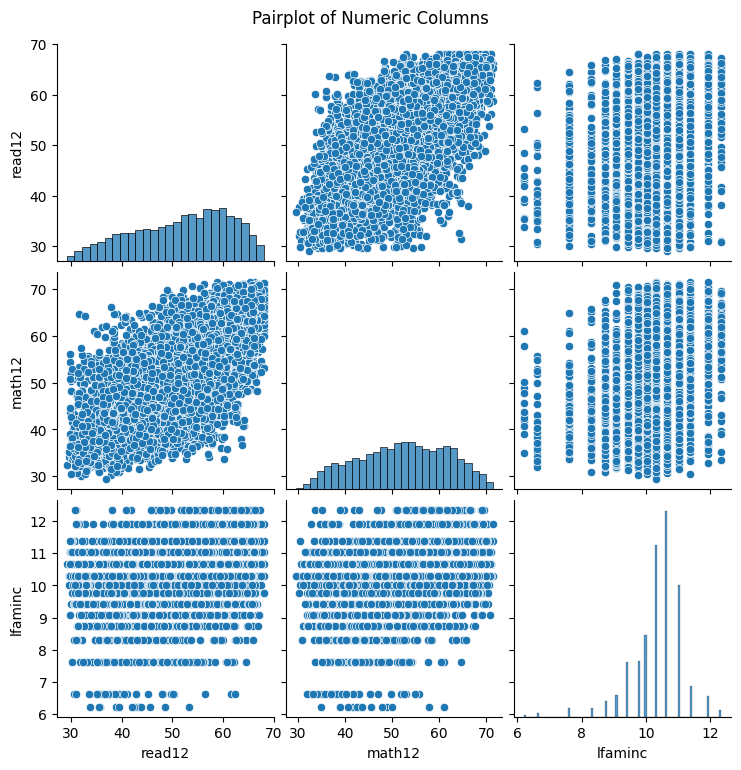

In [16]:
sns.pairplot(df[numeric_columns])
plt.suptitle("Pairplot of Numeric Columns", y=1.02)
plt.show()

# Time Series Decomposition

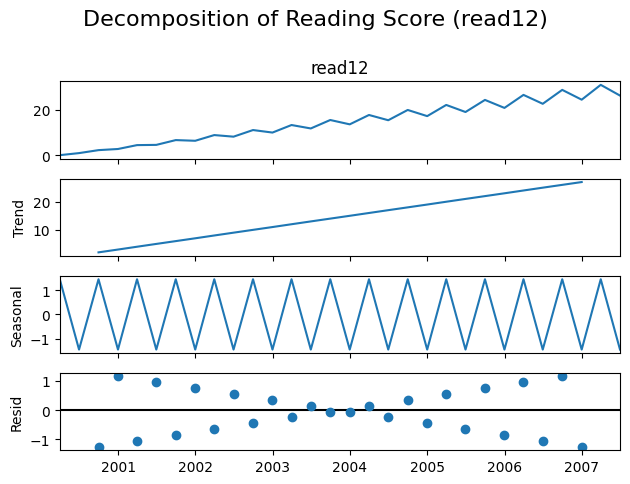

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose

# For demonstration, let's create a sample DataFrame with 30 periods
data = {'read12': [i + (i * 0.1) * (-1) ** i for i in range(30)]}  # Example data
df = pd.DataFrame(data)

# Create a date range with 'QE' frequency (quarterly end)
df['Date'] = pd.date_range(start='2000-01-01', periods=len(df), freq='QE')
df.set_index('Date', inplace=True)

# Decompose the 'read12' variable
result = seasonal_decompose(df['read12'], model='additive', period=4)

# Plot the decomposition
result.plot()
plt.suptitle("Decomposition of Reading Score (read12)", fontsize=16, y=1)
plt.tight_layout()
plt.show()

# Cycle (Seasonal) Component

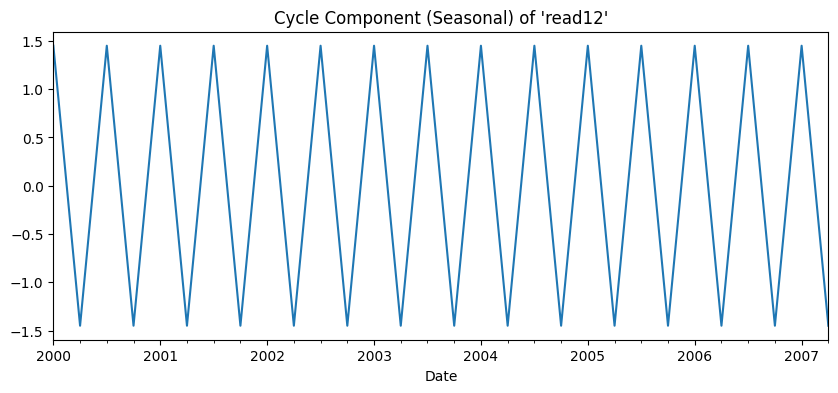

In [26]:
cycle_component = result.seasonal
# plot the cycle component
plt.figure(figsize=(10, 4))
cycle_component.plot()
plt.title("Cycle Component (Seasonal) of 'read12'")
plt.show()

# Plot the Time Series of 'read12'

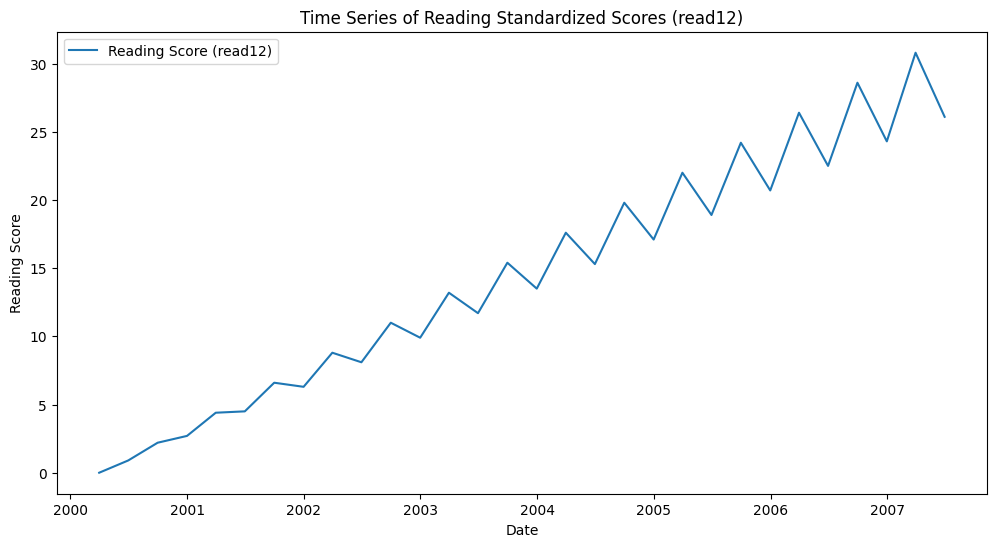

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['read12'], label='Reading Score (read12)')
plt.title("Time Series of Reading Standardized Scores (read12)")
plt.xlabel("Date")
plt.ylabel("Reading Score")
plt.legend()
plt.show()

# Regression Line - Relationship between 'read12' and 'math12'

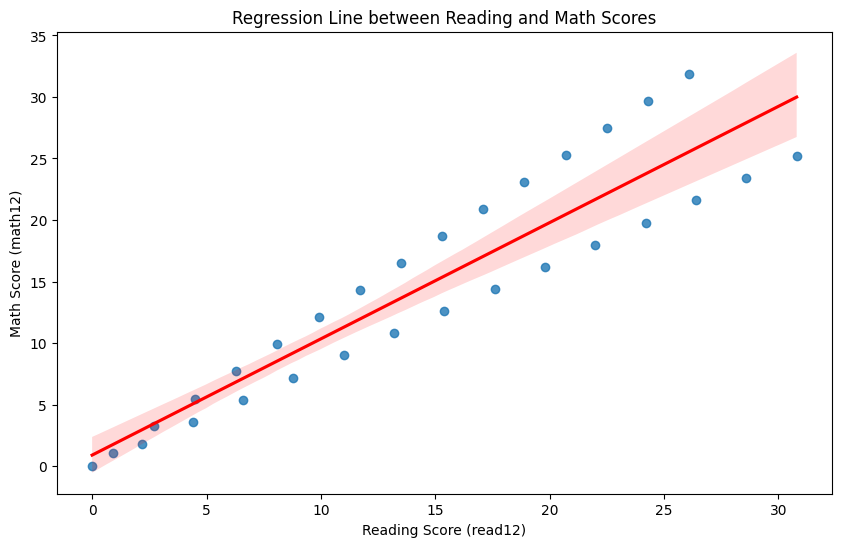

In [30]:
data = {
    'read12': [i + (i * 0.1) * (-1) ** i for i in range(30)],  # Example reading scores
    'math12': [i + (i * 0.1) * (-1) ** (i + 1) for i in range(30)]  # Example math scores
}
df = pd.DataFrame(data)

# Plotting the regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='read12', y='math12', data=df, line_kws={"color": "red"})
plt.title("Regression Line between Reading and Math Scores")
plt.xlabel("Reading Score (read12)")
plt.ylabel("Math Score (math12)")
plt.show()